![](../images/logos/KIEPSKIES.jpg)

# TIME SERIES ANALYSIS 
## 1. Introduction to Time Series

- What is a time series?
- Examples of time series data (e.g., stock prices, weather data, sales data).
- Difference between time series data vs. cross-sectional data.
- Importance of time series analysis in business, economics, and science.


**Scenario**

Imagine you're tracking your daily steps on a fitness app. Over time, you notice patterns—maybe you walk more on weekends or hit fewer steps on rainy days. This kind of data, recorded at consistent time intervals, is called time series data.

**What is Time Series?**

A time series is simply a sequence of data points collected over time. Each observation is linked to a specific timestamp — whether it's seconds, minutes, days, months, or years. Unlike a random collection of numbers, time series data has an order, and that order matters.

**Examples of Time Series Data** 

Time series data is everywhere! Here are some common examples:

* Stock Prices – How Apple’s stock fluctuates daily.
* Weather Patterns – Daily temperature changes over a year.
* Sales Data – Monthly revenue of an e-commerce store.
* Heart Rate Monitoring – Data from a smartwatch tracking your pulse.

**Time Series vs. Cross-Sectional Data**

*Time Series Data tracks* the same variable over different time periods. (E.g., daily stock prices of Tesla for one year.)

*Cross-Sectional Data* captures multiple variables at a single point in time. (E.g., income levels of 1,000 people in 2024.)

**Why is Time Series Analysis Important?**

Understanding time series data helps us:

📈 Predict the future (e.g., will Bitcoin rise next month?).

📊 Identify trends (e.g., is global warming getting worse?).

⚡ Make smarter business decisions (e.g., when should a store restock its inventory?).

Whether you're forecasting sales, detecting fraud, or analyzing climate change, time series analysis is a powerful tool. Ready to dive deeper? Let’s explore! 🚀

**Components of Time Series** 

![](../images/time-series-components.png)

The above graph represents an example of a time series data. To understand the underlying structure in time series, it is broken down into three components; trend, seasonality and noise. These components characterize the pattern and behavior of data over time. 

1. *Trend*; This will show the general direction of data whether it is upward(increasing) or downward(decreasing). They indicate long-term movement depicting overall growth or decline. The above chart shows that there was an overall growth(upward trend) over the year
2. *Seasonality*; It is the predictable pattern that appear regularly. In the chart above there is a quarterly rise and drop of values.
3. *Cycles*; represents the fluctuations that don't have a fixed period.
4. *Noise/Irregularity*; its is the residual variability of data that has no explanations by the factors affecting the trend. The variability is always small compared to the trend and cycle. 

## 2. Time Series Data Manipulation in Python

- Importing time series data using pandas.
- Parsing dates and handling datetime objects.
- Resampling and frequency conversion (e.g., daily to monthly).
- Handling missing data in time series.

**1. Importing Time Series Data with Pandas**

First, we need to load our dataset. If you have a CSV file containing Facebook stock data, let’s bring it into Python using pandas:

In [1]:
import pandas as pd  

# Load the dataset (assuming it has a 'Date' column and 'Open' price)
df = pd.read_csv("../data/meta-stocks.csv")  

# Display the first few rows
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-03-05 00:00:00-05:00,186.069221,188.270818,183.190219,184.465347,19333400,0.0,0.0
1,2020-03-06 00:00:00-05:00,177.651372,183.080629,175.589242,180.400864,24559600,0.0,0.0
2,2020-03-09 00:00:00-04:00,168.954621,174.334066,164.561399,168.854996,29949000,0.0,0.0
3,2020-03-10 00:00:00-04:00,174.005308,177.611527,168.854984,177.511917,24517800,0.0,0.0
4,2020-03-11 00:00:00-04:00,173.347821,175.210715,167.021994,169.592178,20373900,0.0,0.0


**2. Parsing Dates and Handling Datetime Objects**

Time series data is all about time, so we need to convert the 'Date' column into a proper datetime object.

In [2]:
# Supress Python Warning - Not important for the course
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df.set_index('Date', inplace=True)

# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1256 entries, 2020-03-05 00:00:00-05:00 to 2025-03-04 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1256 non-null   float64
 1   High          1256 non-null   float64
 2   Low           1256 non-null   float64
 3   Close         1256 non-null   float64
 4   Volume        1256 non-null   int64  
 5   Dividends     1256 non-null   float64
 6   Stock Splits  1256 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.5+ KB


**3. Handling Missing Data in Time Series**

Stock market data can have missing values due to holidays or technical issues. Let's check for missing data:

In [4]:
# Check for missing values
print(df.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


## 3.  Exploratory Data Analysis (EDA) for Time Series

- Visualizing trends and patterns using Matplotlib and Seaborn.
- Identifying seasonality, trend, and irregularities.
- Moving averages and smoothing techniques.
- Detecting outliers in time series data.

Now that we’ve ensured that our stock prices is clean and structured, it’s time to explore and analyze the data! This step helps us understand patterns, trends, seasonality, and anomalies before diving into forecasting. Lets begin our visual analysis; 

**Step 1:** *Visualizing trends and patterns*

A quick way to spot patterns in time series data is by plotting it! Let’s use Matplotlib and Seaborn to visualize the daily open prices of Facebook stocks.

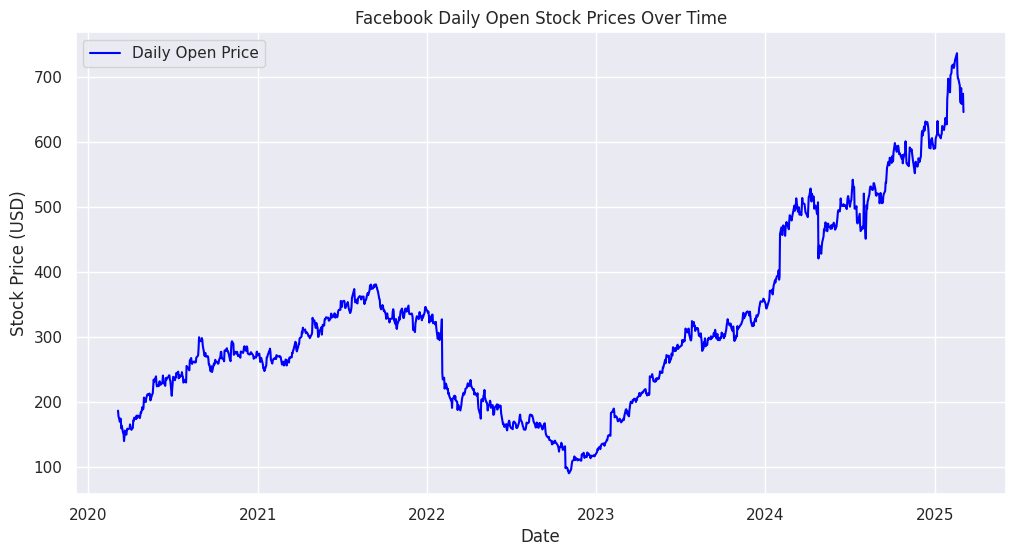

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set()

# Plot the Open prices over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Open'], color='blue', label='Daily Open Price') # Data is the index column
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Facebook Daily Open Stock Prices Over Time")
plt.legend()
plt.show()

<span style="color: #00008B;">**What to Look For?**</span> 

- Is the stock price increasing or decreasing over time? (Trend)
- Are there repeating patterns every month, quarter, or year? (Seasonality)
- Are there sudden jumps or drops? (Irregularities & Outliers)

**Step 2:** *Identifying seasonality, trend, and irregularities.*

Our Facebook Time series data will be decomposed down into three components:

- *Trend* - The overall direction of the data (upward/downward).
- *Seasonality* - Repeating patterns at fixed time intervals (e.g., yearly trends).
- *Residual (Irregularity)* - Random fluctuations that don’t follow a trend or seasonal pattern.

The `statsmodels` package is used to decompose the time series data:

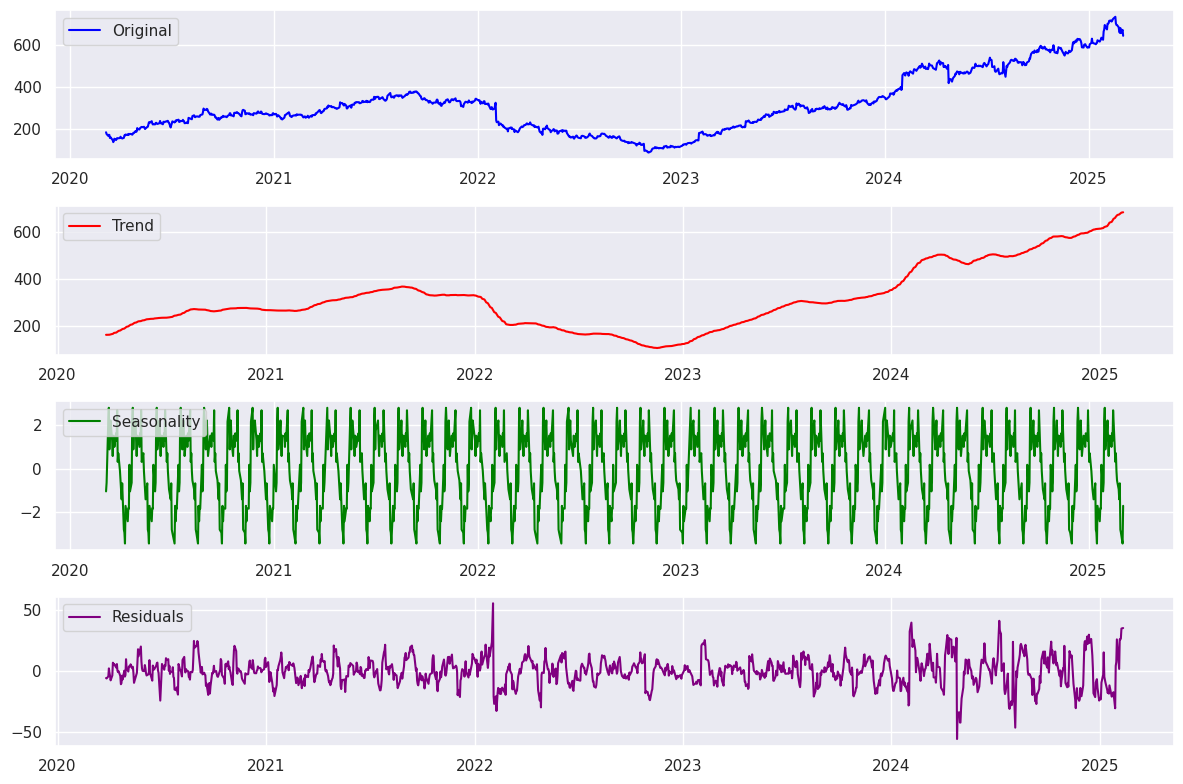

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['Open'], model='additive', period=30)

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['Open'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='purple')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

<span style="color: #00008B;">**Interpretation**</span>

- The trend line shows that the Facebook’s stock price is increasing over time. Stock price increased from approx 200USD to above 600USD
- The seasonal component revealed the repeating patterns in stock movements. There is temporary fall and rise of stocks by +/- ve 2 USDs
- The residuals captured unexpected fluctuations (e.g., stock crashes or spikes). Some days there were stock crash of upto 50USD in a single day which is unexpected

**Step 3:** *Moving averages and smoothing techniques.*

Stock prices fluctuate daily, making it hard to see long-term trends. A moving average (MA) smooths out short-term noise to reveal clearer patterns.

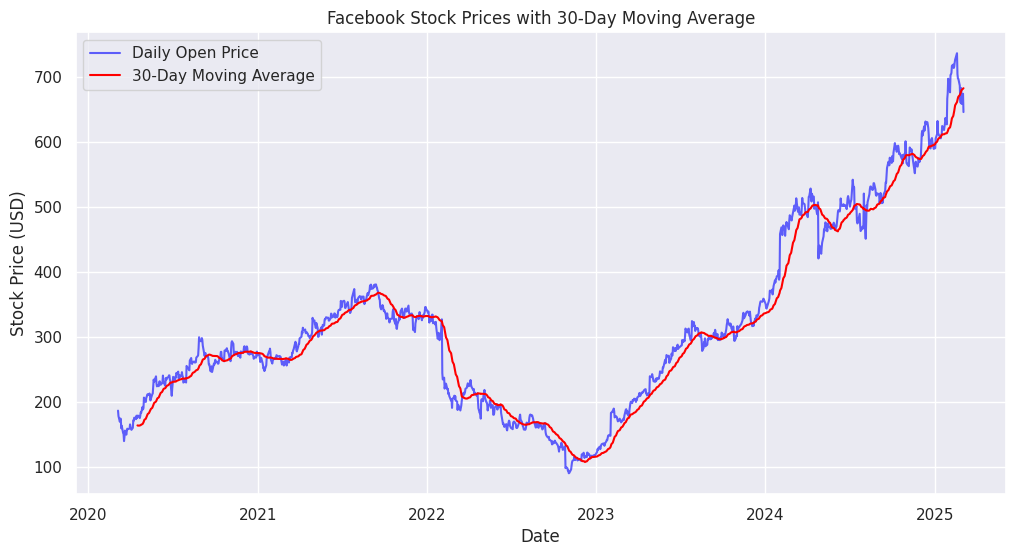

In [7]:
# SIMPLE MOVING AVERAGE (SMA)

## Compute 30-day moving average
df['30-day SMA'] = df['Open'].rolling(window=30).mean()

# Plot the original and smoothed data
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label='Daily Open Price', color='blue', alpha=0.6)
plt.plot(df['30-day SMA'], label='30-Day Moving Average', color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Facebook Stock Prices with 30-Day Moving Average")
plt.legend()
plt.show()

<span style="color: #00008B;">**What Does This Do?**</span> 

- The original daily prices are shown in blue.
- The red line (SMA) smooths out short-term fluctuations and reveals trends.

Other smoothing techniques include:

* *Exponential Moving Average (EMA)*: (gives more weight to recent data).
* *Weighted Moving Average (WMA)*: (applies different weights to past values).


## 4. Stationarity and Differencing

- What is stationarity, and why is it important?
- Augmented Dickey-Fuller (ADF) Test for stationarity.
- Differencing techniques to remove trends and make data stationary.

Now that we’ve decomposed Facebook stock prices into trends, seasonality, and residuals, it’s time to check if our data is stationary!

<span style="color: #00008B;">**What is Stationarity, and Why is it Important?**</span>

A stationary time series is one where:
- The mean (average value) remains constant over time.
- The variance (spread of values) stays consistent.
- The covariance (relationship between past and future values) does not change over time.

<span style="color: #00008B;">**📌 Why does this matter?**</span> 

Most time series models (like ARIMA) assume stationarity for accurate forecasting. If the data is not stationary, we must transform it before modeling.

<span style="color: #00008B;">**Checking for Stationarity using the Augmented Dickey-Fuller (ADF) Test**</span> 

The ADF test helps determine if a time series is stationary.

- Null Hypothesis (H₀): The data is non-stationary (it has a trend).
- Alternative Hypothesis (H₁): The data is stationary.

📌 If the p-value < 0.05, we reject H₀ → The data is stationary!

In [8]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF Test
result = adfuller(df['Open'])

# Print the results
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

# Interpret the result
if result[1] < 0.05:
    print("\n ✅ The data is stationary (Reject H₀)")
else:
    print("\n ❌ The data is non-stationary (Fail to reject H₀)")


ADF Test Statistic: 0.39507098666756457
p-value: 0.9813096758294274
Critical Values: {'1%': np.float64(-3.4355796466416777), '5%': np.float64(-2.863849421064024), '10%': np.float64(-2.5679995625056926)}

 ❌ The data is non-stationary (Fail to reject H₀)


<br>
<br>

<span style="color: #00008B;">**Differencing: Removing Trends to Make Data Stationary**</span>

Since the ADF test showed non-stationarity, we will use differencing to remove trends.

Differencing subtracts each value from the previous one, helping to eliminate trends.

In [9]:
df['Open_diff'] = df['Open'].diff()  # First order differencing

# Drop NaN values (first row will be NaN)
df.dropna(inplace=True)

# Re-run the ADF test on differenced data
result = adfuller(df['Open_diff'])

print("ADF Test Statistic after differencing:", result[0])
print("p-value after differencing:", result[1])

ADF Test Statistic after differencing: -27.96871665688547
p-value after differencing: 0.0


If the p-value is above 0.05, the data is still non-stationary we perform second order difference(i.e is running ADF test on the difference data as below);
```
df['Open_diff2'] = df['Open_diff'].diff()
df.dropna(inplace=True)

# Run ADF test again
result = adfuller(df['Open_diff2'])

print("ADF Test Statistic after second differencing:", result[0])
print("p-value after second differencing:", result[1])
```
🚀 Once the data is stationary (p-value < 0.05), we can proceed with forecasting models! In this case the p-value is below 0.05: Therefore lets continue

## 6. Time Series Forecasting Techniques

- Naïve forecasting and moving averages.
- Exponential Smoothing (Simple, Double, Holt-Winters).
- ARIMA (AutoRegressive Integrated Moving Average) modeling.
- SARIMA (Seasonal ARIMA) for seasonal data.

Now that we’ve made Facebook stock prices stationary, it’s time to forecast future values using ARIMA (AutoRegressive Integrated Moving Average). Lets focus on ARIMA modelling for forecasting the stock prices

<span style="color: #00008B;">**What is ARIMA**</span> 

ARIMA is a powerful time series forecasting model that consists of three key components:

- AR (AutoRegression) – Uses past values to predict future values.
- I (Integrated) – Differencing is applied to make the data stationary.
- MA (Moving Average) – Uses past forecast errors to improve predictions.

📌 ARIMA is written as ARIMA(p, d, q), where:

- p = Number of lag observations (AR component).
- d = Number of differencing steps (to make the data stationary).
- q = Number of past error terms (MA component).

Forecasting with ARIMA model will be broken down step by step; 

**Step 1:** Determine ARIMA Parameters (p, d, q)

Instead of guessing, we use AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF) to determine the best p and q values.

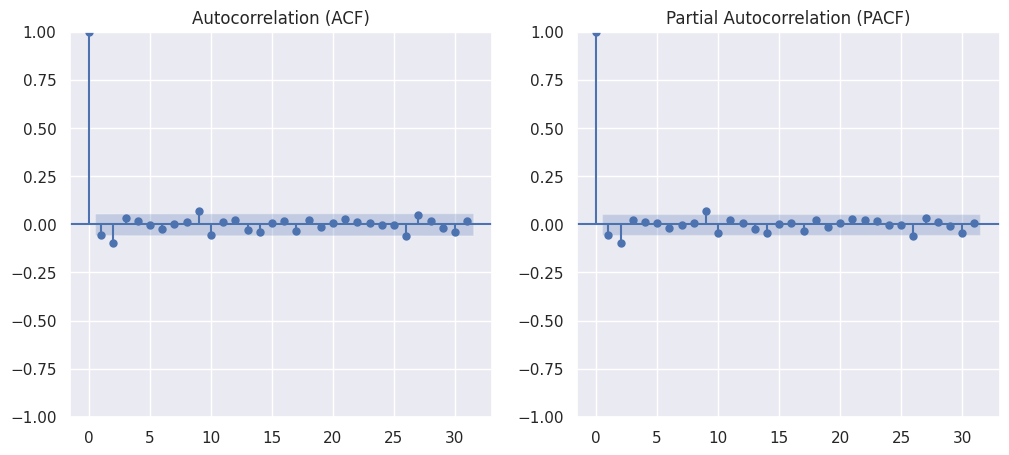

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(df['Open_diff'], ax=axes[0])
axes[0].set_title("Autocorrelation (ACF)")

plot_pacf(df['Open_diff'], ax=axes[1])
axes[1].set_title("Partial Autocorrelation (PACF)")

plt.show()

From the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots, we observe:

- ACF: Almost all values drop close to zero immediately after lag 1.
- PACF: Similar behavior, with no significant spikes after lag 1.

Choosing (p, d, q) for ARIMA;

- p (AR order): Since the PACF cuts off quickly, we set p = 0 or 1.
- d (Differencing order): If the data was already differenced once (to make it stationary), we keep d = 1.
- q (MA order): Since the ACF also cuts off quickly, we set q = 0 or 1.

🔹 Best guess for ARIMA order: (1,1,1)

**Step 6:** Build and Fit the ARIMA Model

Once we select p, d, q, we build the ARIMA model:

In [11]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(df['Open'], order=(1, 1, 1))  # Example: ARIMA(1,1,1)

# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 1227
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4329.198
Date:                Fri, 07 Mar 2025   AIC                           8664.395
Time:                        15:14:30   BIC                           8679.730
Sample:                             0   HQIC                          8670.166
                               - 1227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4102      0.200      2.054      0.040       0.019       0.802
ma.L1         -0.4841      0.197     -2.460      0.014      -0.870      -0.098
sigma2        68.3357      0.883     77.415      0.0

ARIMA(1,1,1) model for Facebook stock's Open prices has been successfully fitted. Let's break down the key insights from the model summary:

- Both AR(1) and MA(1) are statistically significant (p < 0.05), meaning they contribute meaningfully to the model.
- The model suggests that yesterday's price and past forecast errors are strong indicators of today's price.

**Step 3:** Forecast Future Prices

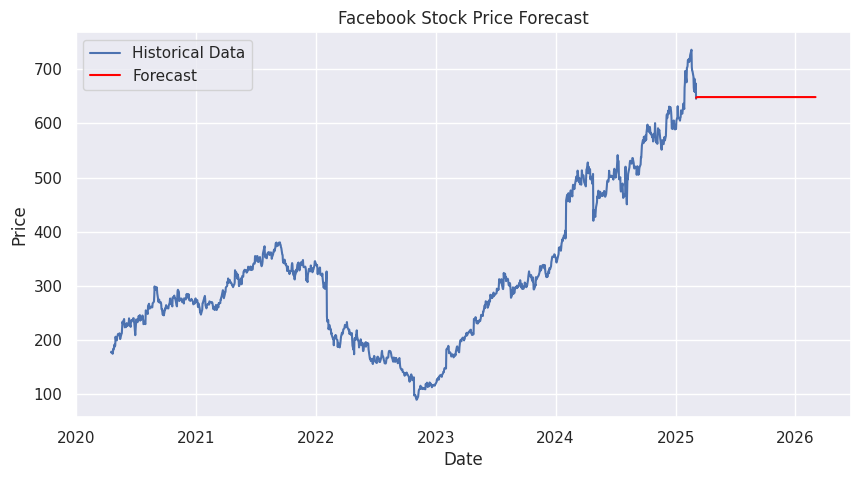

In [12]:
import warnings
warnings.filterwarnings("ignore")

# Forecast the next 10 days
forecast = model_fit.forecast(steps=365)

# Plot Forecast
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Open'], label='Historical Data')
plt.plot(pd.date_range(start=df.index[-1], periods=365, freq='D'), forecast, label='Forecast', color='red')
plt.title("Facebook Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## 7. Advanced Time Series Models (Optional for experienced students)

- LSTMs (Long Short-Term Memory Networks) for Time Series Forecasting.
- Facebook’s Prophet model for forecasting.
- Handling multivariate time series.

## 8. Time Series Anomaly Detection (Optional for real-world applications)

- Identifying anomalies using statistical methods.
- Using machine learning for anomaly detection in time series.
- Real-world applications (e.g., fraud detection, predictive maintenance).